# Clustering - Fundamentação Teórica
* Identifica grupos similares
* A similaridade pode ser local (apenas com os vizinhos, o que é bom para clusters não esféricos mas ruim para clusters sobrepostos) ou globais (considera a semelhança com o cluster como um todo)
* **É um algoritmo não supervisionado**
    * Sem dados rotulados (sem exemplos)
    * Não existe atributo meta: buscamos indentificar padrões nos dados, e depois descobrimos o que eles significam 
    * Não requer grande conhecimento prévio
    * Melhor para indentificar padrões naturais, sem informações a priori (que podem ser sujas ou tentenciosas)
* **hierarquical clustering**
  * nested clusters 
  * agglomerative algorithms: start by building small clusters and then create higher levels
  * Divisive algorithms: first create higher levels of the hierarchical clustering
* **K means algorithm**
  * Utilização: bom para cluster compactos, esféricos.
  * Algoritmo
    * Cada ponto é atribuido aleatoriamente para um dos K clusters
    * Calculates the cluster centroid (centro de massa)
    * Each object is reassinged to the nearest centroid
    * quando parar de se mexer, para
  * how to choose K
    * SSE = sum of squared error (distance to all points to its centriod)
    * elbow method: when increasing K almost dont decrease SSE
    
## The Data

We will use a data frame with 777 observations on the following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

It is **very important** to note, we actually have the labels for this data set, but we will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Get the Data

In [2]:
data =  pd.read_csv ('College_Data')
data['Private'] = data['Private'].apply(lambda label: label=='Yes')
data.head(40)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,True,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,True,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,True,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,True,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,True,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,True,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,True,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,True,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,True,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,True,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [3]:
data[data['Private']==True].describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,1977.929204,1305.702655,456.945133,29.330973,56.957522,1872.168142,433.966372,11801.693805,4586.143363,547.506195,1214.440708,71.093805,78.534513,12.945487,25.890265,10486.353982,68.998230
std,2443.341319,1369.549478,457.529136,17.851391,19.588360,2110.661773,722.370487,3707.470822,1089.697557,174.932303,632.879647,17.350886,15.450251,3.518573,12.400755,5682.576587,16.749457
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,2370.000000,250.000000,250.000000,8.000000,24.000000,2.500000,2.000000,3186.000000,15.000000
25%,619.000000,501.000000,206.000000,17.000000,42.000000,840.000000,63.000000,9100.000000,3736.000000,450.000000,800.000000,60.000000,68.000000,11.100000,16.000000,7477.000000,58.000000
50%,1133.000000,859.000000,328.000000,25.000000,55.000000,1274.000000,207.000000,11200.000000,4400.000000,500.000000,1100.000000,73.000000,81.000000,12.700000,25.000000,8954.000000,69.000000
75%,2186.000000,1580.000000,520.000000,36.000000,70.000000,2018.000000,541.000000,13970.000000,5400.000000,600.000000,1500.000000,85.000000,92.000000,14.500000,34.000000,11625.000000,81.000000
max,20192.000000,13007.000000,4615.000000,96.000000,100.000000,27378.000000,10221.000000,21700.000000,8124.000000,2340.000000,6800.000000,100.000000,100.000000,39.800000,64.000000,56233.000000,118.000000


In [4]:
data[data['Private']==False].describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,5729.919811,3919.287736,1640.872642,22.834906,52.702830,8571.004717,1978.188679,6813.410377,3748.240566,554.377358,1676.981132,76.834906,82.816038,17.139151,14.358491,7458.316038,56.042453
std,5370.675335,3477.266276,1261.592009,16.180443,20.091058,6467.696087,2321.034696,2145.248389,858.139928,135.729935,677.515680,12.317525,12.069669,3.418049,7.518935,2695.541611,14.583412
min,233.000000,233.000000,153.000000,1.000000,12.000000,633.000000,9.000000,2580.000000,1780.000000,96.000000,400.000000,33.000000,33.000000,6.700000,0.000000,3605.000000,10.000000
25%,2190.750000,1563.250000,701.750000,12.000000,37.000000,3601.000000,600.000000,5366.000000,3121.500000,500.000000,1200.000000,71.000000,76.000000,15.100000,9.000000,5715.000000,46.000000
50%,4307.000000,2929.500000,1337.500000,19.000000,51.000000,6785.500000,1375.000000,6609.000000,3708.000000,550.000000,1649.000000,78.500000,86.000000,17.250000,13.500000,6716.500000,55.000000
75%,7722.500000,5264.000000,2243.750000,27.500000,65.000000,12507.000000,2495.250000,7844.000000,4362.000000,612.000000,2051.250000,86.000000,92.000000,19.325000,19.000000,8570.250000,65.000000
max,48094.000000,26330.000000,6392.000000,95.000000,100.000000,31643.000000,21836.000000,15732.000000,6540.000000,1125.000000,4288.000000,103.000000,100.000000,28.800000,48.000000,16527.000000,100.000000


## EDA

It's time to create some data visualizations!

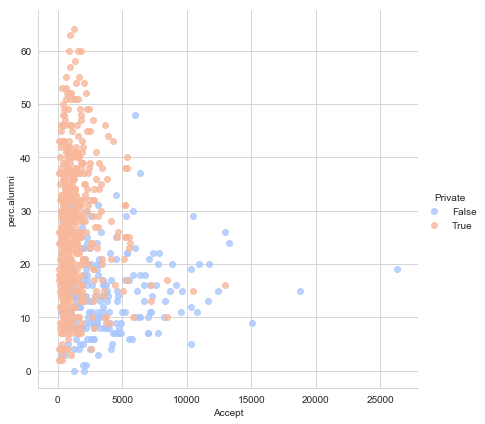

In [5]:
sns.set_style('whitegrid')
sns.lmplot('Accept','perc.alumni',data=data, hue='Private',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

**Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

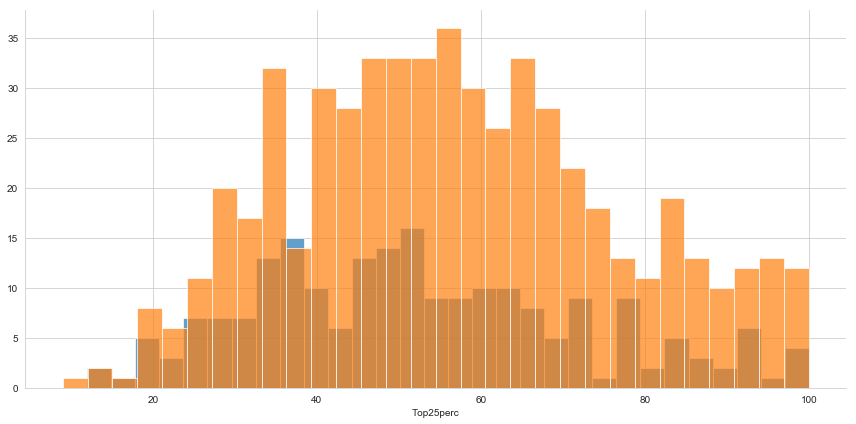

In [6]:
g = sns.FacetGrid(data,hue="Private",height=6,aspect=2)
g = g.map(plt.hist,'Top25perc',bins=30,alpha=0.7)

**Create a similar histogram for the Grad.Rate column.**

** Notice how there seems to be a private school with a graduation rate of higher than 100%.What is the name of that school?**

In [7]:
data[data ['Grad.Rate']>100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,True,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [8]:
data.drop(95, inplace=True)


** Set that school's graduation rate to 100 so it makes sense. You may get a warning not an error) when doing this operation, so use dataframe operations or just re-do the histogram visualization to make sure it actually went through.**

In [9]:
data[data ['Grad.Rate']>100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


## K Means Cluster

Now it is time to create the Cluster labels!

In [10]:
## PREPROCESSING
# minMax normalization 
droped = data.drop(['Private', 'Unnamed: 0'], axis=1)
normalized=(droped-droped.min())/(droped.max()-droped.min()) + 1

# Giving more weight to important features
normalized['Enroll'] = normalized['Enroll'].apply(lambda x: x*x if x>1.2 else x)
normalized['F.Undergrad'] = normalized['F.Undergrad'].apply(lambda x: x*x if x>1.15 else x)
normalized['Room.Board'] = normalized['Room.Board'].apply(lambda x: x*1.1 if x>1.6 else x)

normalized['perc.alumni'] = normalized['perc.alumni']*2
normalized['Accept'] = normalized['Accept']*2

normalized

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1.032887,2.088354,1.107913,1.231579,1.472527,1.087164,1.024548,1.263430,1.239596,1.157754,1.297710,1.652632,1.710526,1.418231,2.37500,1.072671,1.555556
1,1.043842,2.141062,1.075035,1.157895,1.219780,1.080752,1.056148,1.513430,1.909741,1.291444,1.190840,1.221053,1.078947,1.260054,2.50000,1.138387,1.511111
2,1.028055,2.078071,1.047349,1.221053,1.450549,1.028473,1.004488,1.460227,1.310530,1.135472,1.139695,1.473684,1.552632,1.278820,2.93750,1.104605,1.488889
3,1.006998,2.021098,1.016045,1.621053,1.879121,1.011776,1.002839,1.548554,1.578499,1.157754,1.095420,1.884211,1.960526,1.139410,3.15625,1.298415,1.544444
4,1.002333,2.005636,1.003146,1.157895,1.384615,1.003492,1.039753,1.269628,1.368852,1.313725,1.190840,1.715789,1.631579,1.252011,2.06250,1.145833,1.055556
5,1.010539,2.031000,1.019349,1.389474,1.582418,1.017109,1.001832,1.576446,1.245113,1.180036,1.064885,1.621053,1.644737,1.184987,2.34375,1.123306,1.500000
6,1.005665,2.020413,1.010697,1.168421,1.395604,1.008793,1.010488,1.565599,1.783165,1.180036,1.190840,1.863158,1.907895,1.241287,2.81250,1.106981,1.588889
7,1.037865,2.125524,1.071417,1.378947,1.648352,1.046185,1.001420,1.595455,1.480139,1.157754,1.091603,1.852632,2.000000,1.300268,3.15625,1.156484,1.700000
8,1.019932,2.058420,1.030203,1.305263,1.593407,1.026473,1.013968,1.684659,1.412989,1.090909,1.038168,1.747368,1.789474,1.235925,2.71875,1.159444,1.777778
9,1.010435,2.032447,1.021551,1.210526,1.384615,1.020950,1.003526,1.419835,1.252207,1.251337,1.236641,1.336842,1.223684,1.241287,2.46875,1.109431,1.466667


In [11]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(normalized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

** Create an instance of a K Means model with 2 clusters.**

** What are the cluster center vectors?**

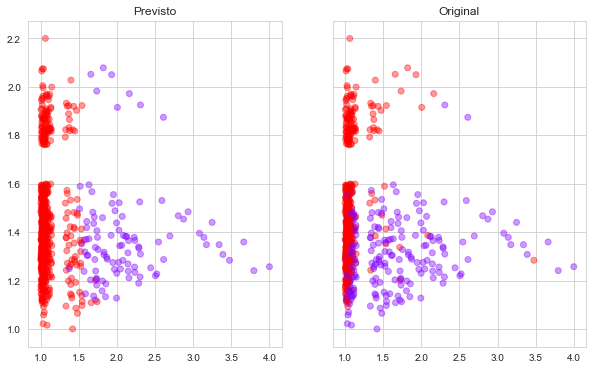

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title("Previsto")
ax1.scatter(normalized['F.Undergrad'],normalized['Room.Board'],c=model.labels_,cmap='rainbow', alpha=0.4)
ax2.set_title("Original")
ax2.scatter(normalized['F.Undergrad'],normalized['Room.Board'],c=data['Private'],cmap='rainbow', alpha=0.4)

## Evaluation

There is no perfect way to evaluate clustering if you don't have the labels, however since this is just an exercise, we do have the labels, so we take advantage of this to evaluate our clusters, keep in mind, you usually won't have this luxury in the real world.

When using the Kmeans algorithm under normal circumstances, it is because you don't have labels. In this case we will use the labels to try to get an idea of how well the algorithm performed, but you won't usually do this for Kmeans, so the classification report and confusion matrix at the end of this project, don't truly make sense in a real world setting!.

In [13]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(data['Private'],model.labels_))
print(classification_report(data['Private'],model.labels_))

[[ 92 120]
 [ 11 553]]
              precision    recall  f1-score   support

       False       0.89      0.43      0.58       212
        True       0.82      0.98      0.89       564

   micro avg       0.83      0.83      0.83       776
   macro avg       0.86      0.71      0.74       776
weighted avg       0.84      0.83      0.81       776

